In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('CleanedSeattleData.csv')

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]  # your features
y = df['INJURY_BINARY'] = df['SEVERITYCODE'].apply(lambda x: 1 if x > 1 else 0)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict the labels on test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.656440274141836
              precision    recall  f1-score   support

           0       0.66      0.99      0.79     22323
           1       0.50      0.03      0.05     11674

    accuracy                           0.66     33997
   macro avg       0.58      0.51      0.42     33997
weighted avg       0.60      0.66      0.54     33997



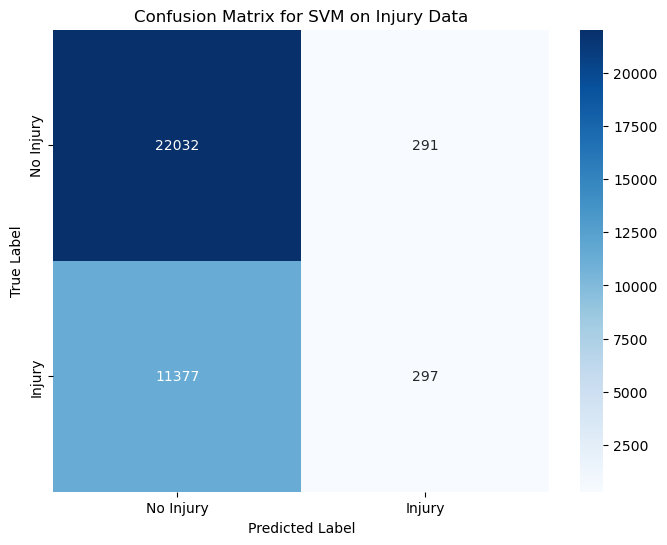

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix for SVM on Injury Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()